# Description


The dataset contains daily rainfall records collected by the National Remote Sensing Centre (NRSC) for the month of October 2023 across various districts in India. It consists of 16,929 records with seven columns, including State, District, Date, Year, Month, Avg_rainfall, and Agency_name. The dataset provides insights into regional rainfall patterns but contains a significant amount of missing values, particularly in the Avg_rainfall column, where nearly 50% of the entries are absent. This missing data might impact accurate weather trend analysis and may require imputation techniques for better insights. The rainfall values vary across districts, with some regions experiencing high rainfall, while others recorded little to no precipitation. Since the data is sourced from the NRSC VIC Model, it is likely an estimation rather than direct observational data. This dataset can be valuable for climate analysis, weather forecasting, disaster management, and agricultural planning, provided the missing values are addressed appropriately.

In [1]:
import pandas as pd
df = pd.read_csv('Daily_Rainfall_data_from_National_Remote_Sensing_Centre_Agency_during_October_2023.csv')
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2023-10-01,2023,10,NaN,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2023-10-07,2023,10,NaN,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2023-10-08,2023,10,NaN,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2023-10-09,2023,10,NaN,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2023-10-10,2023,10,NaN,NRSC VIC MODEL
...,...,...,...,...,...,...,...
16924,West Bengal,Purulia,2023-10-27,2023,10,NaN,NRSC VIC MODEL
16925,West Bengal,Purulia,2023-10-28,2023,10,0.025956,NRSC VIC MODEL
16926,West Bengal,Purulia,2023-10-29,2023,10,0.002044,NRSC VIC MODEL
16927,West Bengal,Purulia,2023-10-30,2023,10,0.003223,NRSC VIC MODEL


Imports pandas and reads data  into a DataFrame

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         16929 non-null  object 
 1   District      16929 non-null  object 
 2   Date          16929 non-null  object 
 3   Year          16929 non-null  int64  
 4   Month         16929 non-null  int64  
 5   Avg_rainfall  8506 non-null   float64
 6   Agency_name   16929 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 925.9+ KB


Dataset info 

In [3]:
df.describe()

,Year,Month,Avg_rainfall
count,16929.0,16929.0,8.506000e+03
mean,2023.0,10.0,2.739954e+00
std,0.0,0.0,7.206245e+00
min,2023.0,10.0,3.000000e-10
25%,2023.0,10.0,2.445709e-03
50%,2023.0,10.0,8.838274e-02
75%,2023.0,10.0,1.833385e+00
max,2023.0,10.0,1.201930e+02


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

Convert 'Date' column to datetime format

In [1]:
df

NameError: name 'df' is not defined

In [6]:
 df.isnull().sum()

State              0
District           0
Date               0
Year               0
Month              0
Avg_rainfall    8423
Agency_name        0
dtype: int64

This code prints the total number of missing (null) values for each column in the dataset, helping identify incomplete data.

In [7]:
df['Avg_rainfall'] = df.groupby(['State', 'District'])['Avg_rainfall'].transform(lambda x: x.fillna(x.mean()))



Fill missing values in 'Avg_rainfall' with the mean rainfall per state-district combination


In [8]:
df['Avg_rainfall'].fillna(df['Avg_rainfall'].mean(), inplace=True)

If there are still missing values, fill them with overall mean rainfall


In [9]:
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobars,2023-10-01,2023,10,2.551361,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2023-10-07,2023,10,2.551361,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2023-10-08,2023,10,2.551361,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2023-10-09,2023,10,2.551361,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2023-10-10,2023,10,2.551361,NRSC VIC MODEL
...,...,...,...,...,...,...,...
16924,West Bengal,Purulia,2023-10-27,2023,10,5.658053,NRSC VIC MODEL
16925,West Bengal,Purulia,2023-10-28,2023,10,0.025956,NRSC VIC MODEL
16926,West Bengal,Purulia,2023-10-29,2023,10,0.002044,NRSC VIC MODEL
16927,West Bengal,Purulia,2023-10-30,2023,10,0.003223,NRSC VIC MODEL


In [10]:
df.isnull().sum()

State           0
District        0
Date            0
Year            0
Month           0
Avg_rainfall    0
Agency_name     0
dtype: int64

Checking if there are still any null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         16929 non-null  object        
 1   District      16929 non-null  object        
 2   Date          16929 non-null  datetime64[ns]
 3   Year          16929 non-null  int64         
 4   Month         16929 non-null  int64         
 5   Avg_rainfall  16929 non-null  float64       
 6   Agency_name   16929 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 925.9+ KB


In [12]:
df.dtypes

State                   object
District                object
Date            datetime64[ns]
Year                     int64
Month                    int64
Avg_rainfall           float64
Agency_name             object
dtype: object

In [13]:
unique_states = df['State'].nunique()
unique_districts = df['District'].nunique()
unique_states, unique_districts

(37, 729)

Count unique states and districts

In [14]:

df[['Year', 'Month']].drop_duplicates(), df['Avg_rainfall'].describe()

(   Year  Month
 0  2023     10,
 count    1.692900e+04
 mean     2.551361e+00
 std      5.445723e+00
 min      3.000000e-10
 25%      3.098294e-02
 50%      7.144415e-01
 75%      3.000305e+00
 max      1.201930e+02
 Name: Avg_rainfall, dtype: float64)

Check unique values in Year, Month, and Avg_rainfall columns to detect anomalies

In [15]:
rainfall_summary = df['Avg_rainfall'].describe()
rainfall_summary

count    1.692900e+04
mean     2.551361e+00
std      5.445723e+00
min      3.000000e-10
25%      3.098294e-02
50%      7.144415e-01
75%      3.000305e+00
max      1.201930e+02
Name: Avg_rainfall, dtype: float64

Summary statistics for Avg_rainfall

In [16]:
total_monthly_rainfall = df.groupby("Month")["Avg_rainfall"].sum()
print("\nTotal Monthly Rainfall:\n", total_monthly_rainfall)


Total Monthly Rainfall:
 Month
10    43191.984226
Name: Avg_rainfall, dtype: float64


Monthly total rainfall

In [17]:
 
def categorize_rainfall(value):
    if value < 1:
        return "Low"
    elif 1 <= value < 5:
        return "Moderate"
    else:
        return "High"

df["Rainfall_Category"] = df["Avg_rainfall"].apply(categorize_rainfall)

df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name,Rainfall_Category
0,Andaman & Nicobar,Nicobars,2023-10-01,2023,10,2.551361,NRSC VIC MODEL,Moderate
1,Andaman & Nicobar,Nicobars,2023-10-07,2023,10,2.551361,NRSC VIC MODEL,Moderate
2,Andaman & Nicobar,Nicobars,2023-10-08,2023,10,2.551361,NRSC VIC MODEL,Moderate
3,Andaman & Nicobar,Nicobars,2023-10-09,2023,10,2.551361,NRSC VIC MODEL,Moderate
4,Andaman & Nicobar,Nicobars,2023-10-10,2023,10,2.551361,NRSC VIC MODEL,Moderate
...,...,...,...,...,...,...,...,...
16924,West Bengal,Purulia,2023-10-27,2023,10,5.658053,NRSC VIC MODEL,High
16925,West Bengal,Purulia,2023-10-28,2023,10,0.025956,NRSC VIC MODEL,Low
16926,West Bengal,Purulia,2023-10-29,2023,10,0.002044,NRSC VIC MODEL,Low
16927,West Bengal,Purulia,2023-10-30,2023,10,0.003223,NRSC VIC MODEL,Low


Create a new column 'Rainfall_Category' based on Avg_rainfall levels

In [18]:

rainfall_category_counts = df["Rainfall_Category"].value_counts()
rainfall_category_counts

Low         9190
Moderate    5501
High        2238
Name: Rainfall_Category, dtype: int64

Count of each category

In [19]:
top_districts = df.groupby("District")["Avg_rainfall"].mean().nlargest(10)
top_districts

District
Alappuzha             20.052560
Pilibhit              17.884551
Jammu                 17.785238
Mahe                  17.692286
Kollam                16.498556
Kottayam              16.430432
Pathanamthitta        15.122844
Ernakulam             14.618752
Thiruvananthapuram    14.216099
Samba                 13.049294
Name: Avg_rainfall, dtype: float64

Group by district to analyze top 10 districts with highest rainfall

In [20]:
state_rainfall = df.groupby("State")["Avg_rainfall"].mean().sort_values(ascending=False)
state_rainfall


State
Kerala                  11.764015
Mizoram                  7.258070
Puducherry               6.079313
Delhi                    5.976001
Goa                      5.150320
West Bengal              4.978623
Jammu & Kashmir          4.848317
Tripura                  4.726078
Jharkhand                4.193503
Tamil Nadu               3.972780
Punjab                   3.951052
Sikkim                   3.420455
Meghalaya                3.376594
Assam                    3.165047
Chandigarh               3.146833
Bihar                    2.916641
Uttar Pradesh            2.737205
Karnataka                2.574420
Lakshadweep              2.551361
Andaman & Nicobar        2.551361
Himachal Pradesh         2.380052
Haryana                  2.349315
Dadra & Nagar Haveli     2.172717
Odisha                   2.124977
Arunachal Pradesh        2.045504
Manipur                  2.044858
Nagaland                 1.620094
Uttarakhand              1.464343
Ladakh                   1.444938
Maharash

State-wise average rainfall (ignoring missing values)

In [21]:
district_rainfall = df.groupby("District")["Avg_rainfall"].mean().sort_values(ascending=False)
district_rainfall

District
Alappuzha           20.052560
Pilibhit            17.884551
Jammu               17.785238
Mahe                17.692286
Kollam              16.498556
                      ...    
Kamareddy            0.000795
Rajanna Sircilla     0.000678
Nizamabad            0.000618
Latur                0.000613
Vadodara             0.000054
Name: Avg_rainfall, Length: 729, dtype: float64

District-wise average rainfall (Top 10 districts)

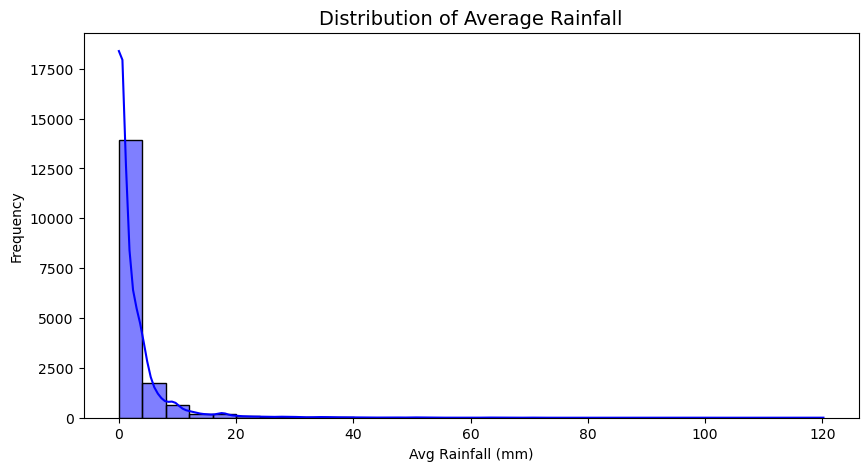

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['Avg_rainfall'], bins=30, kde=True, color='blue')
plt.title("Distribution of Average Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

Distribution of Average Rainfall

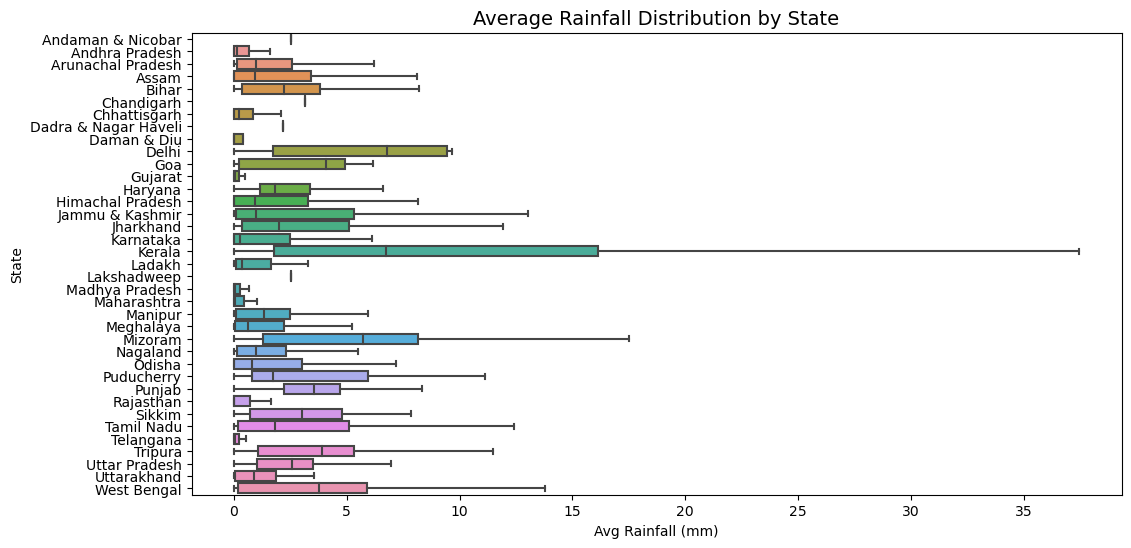

In [23]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Avg_rainfall', y='State', orient='h', showfliers=False)
plt.title("Average Rainfall Distribution by State", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("State")
plt.show()

 Boxplot of Rainfall by State

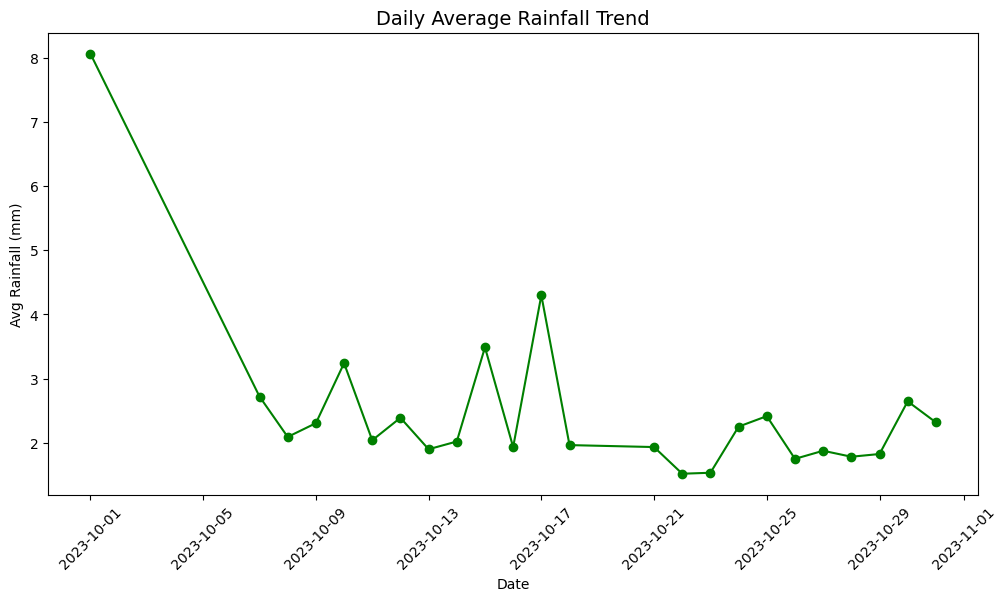

In [24]:

plt.figure(figsize=(12, 6))
daily_rainfall = df.groupby('Date')['Avg_rainfall'].mean()
plt.plot(daily_rainfall, marker='o', linestyle='-', color='green')
plt.title("Daily Average Rainfall Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

 Daily Rainfall Trend

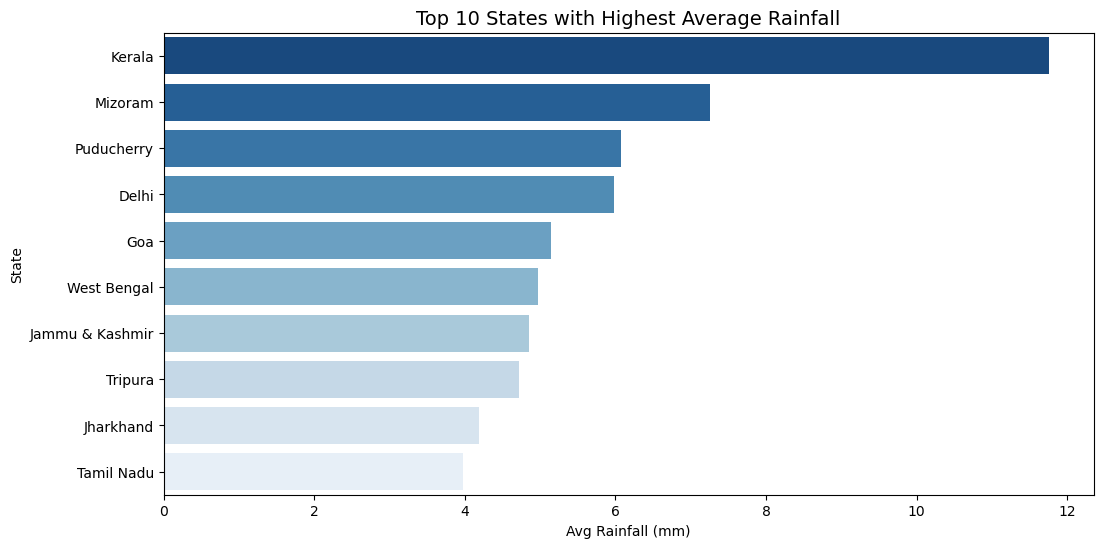

In [25]:

plt.figure(figsize=(12, 6))
top_states = df.groupby('State')['Avg_rainfall'].mean().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='Blues_r')
plt.title("Top 10 States with Highest Average Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("State")
plt.show()

Top 10 States with Highest Rainfall

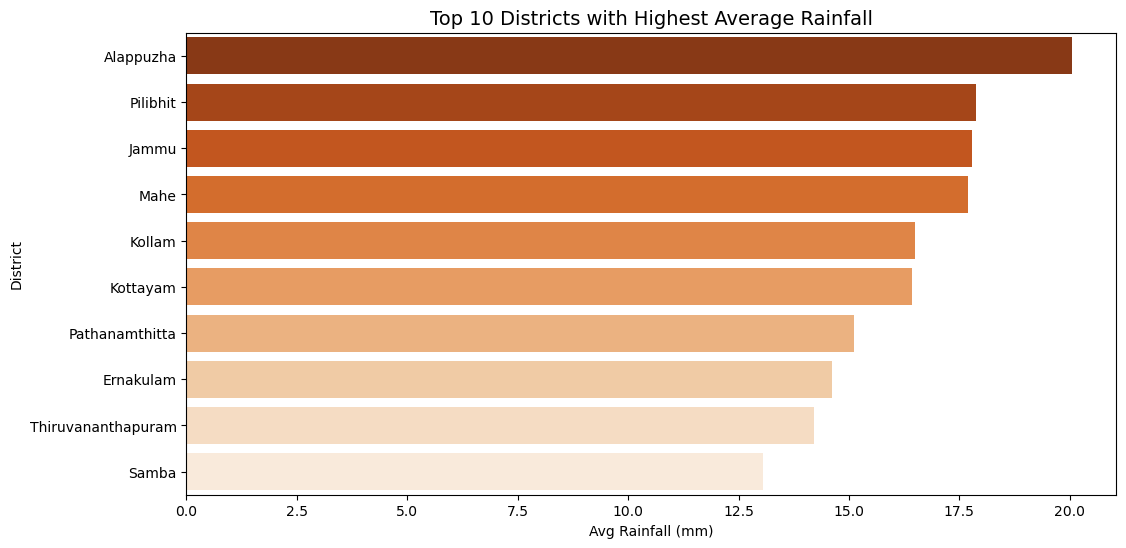

In [26]:

plt.figure(figsize=(12, 6))
top_districts = df.groupby('District')['Avg_rainfall'].mean().nlargest(10)
sns.barplot(x=top_districts.values, y=top_districts.index, palette='Oranges_r')
plt.title("Top 10 Districts with Highest Average Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()

Rainfall by District (Top 10)

<Figure size 1400x700 with 0 Axes>

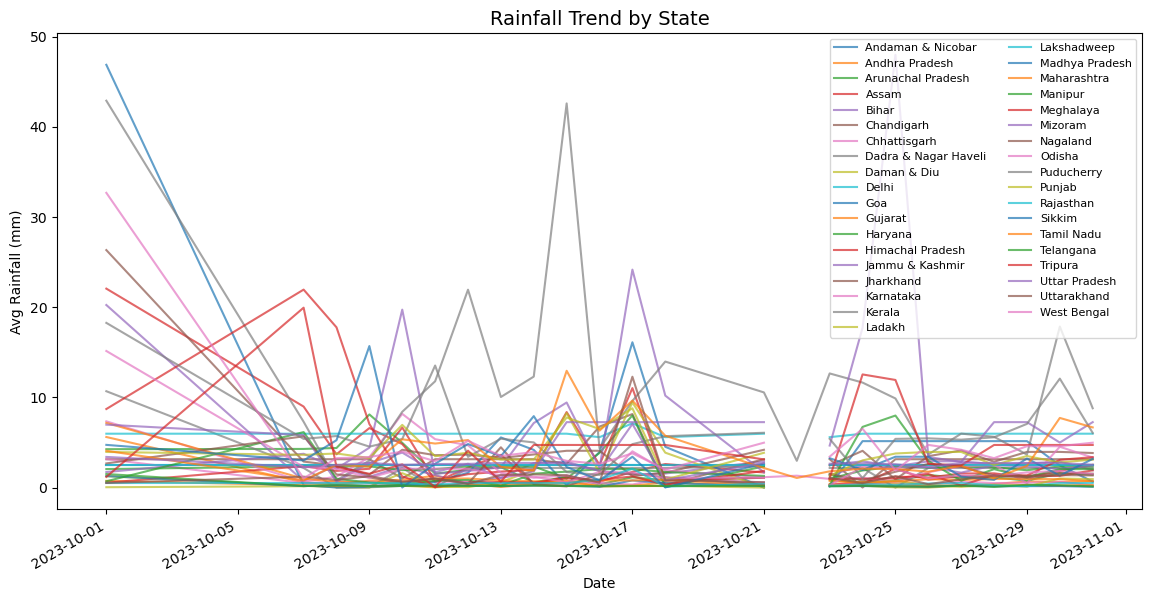

In [27]:

plt.figure(figsize=(14, 7))
state_rainfall_trend = df.groupby(['Date', 'State'])['Avg_rainfall'].mean().unstack()
state_rainfall_trend.plot(figsize=(14, 7), alpha=0.7)
plt.title("Rainfall Trend by State", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.show()

 Rainfall Trend by State

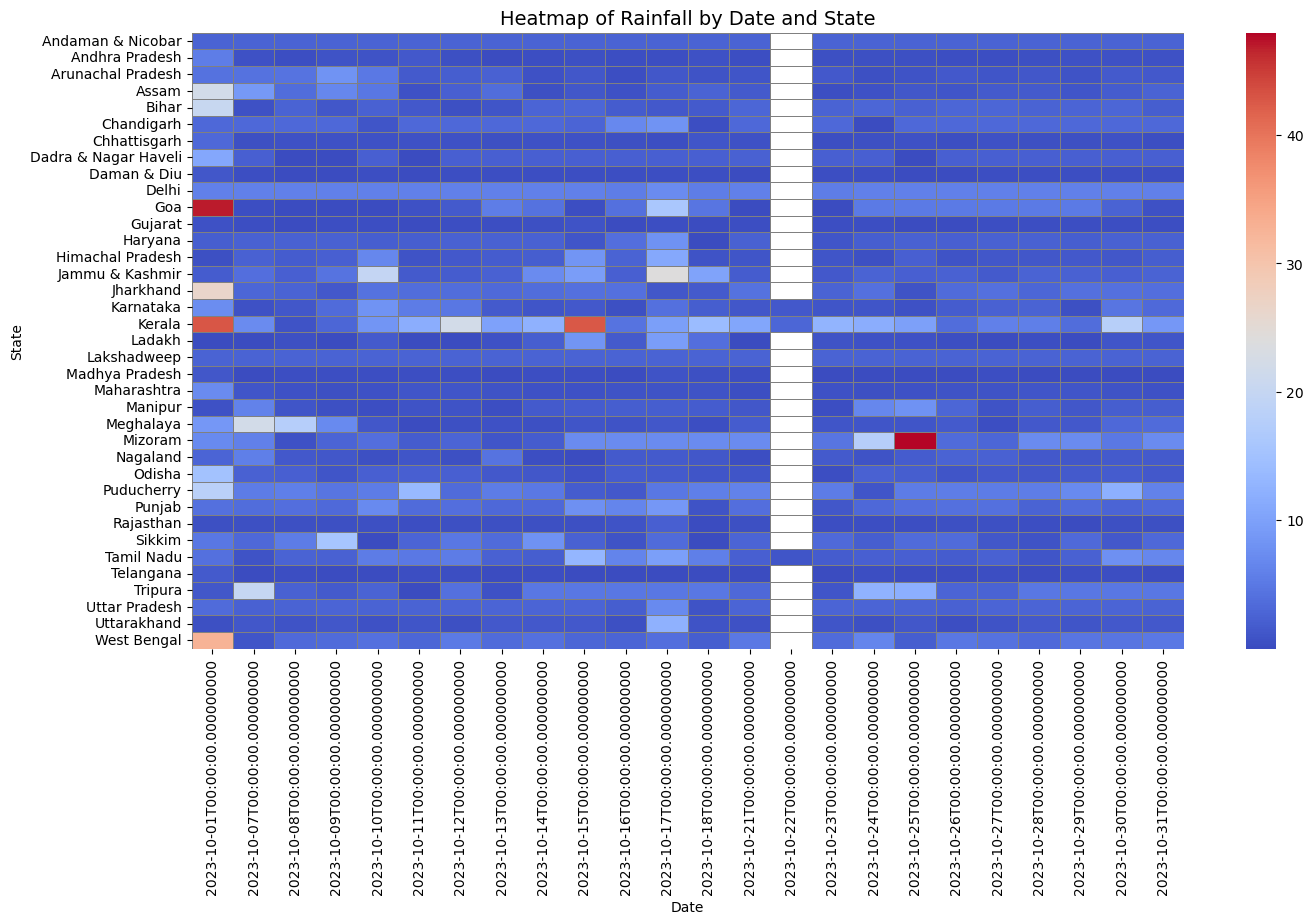

In [28]:

pivot_table = df.pivot_table(values='Avg_rainfall', index='State', columns='Date', aggfunc='mean')
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Rainfall by Date and State", fontsize=14)
plt.xlabel("Date")
plt.ylabel("State")
plt.show()

# Heatmap of Rainfall by Date and State

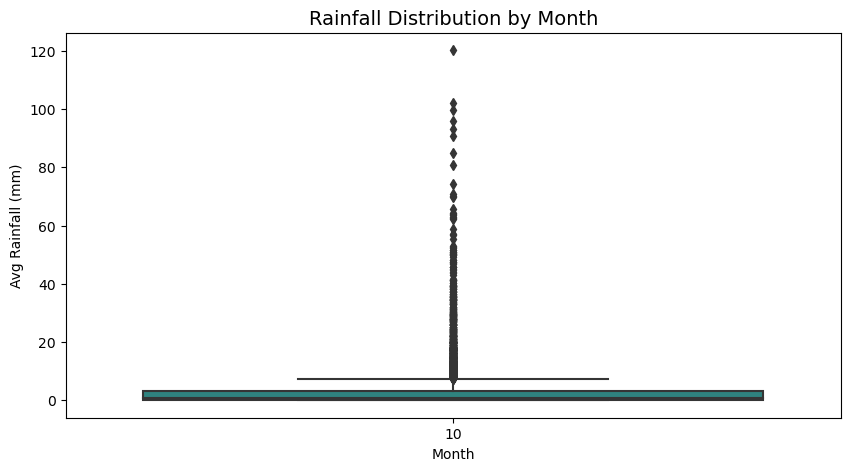

In [29]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=df['Avg_rainfall'], palette='viridis')
plt.title("Rainfall Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Avg Rainfall (mm)")
plt.show()

Rainfall Distribution by Month (Though only October is present, useful for scaling)

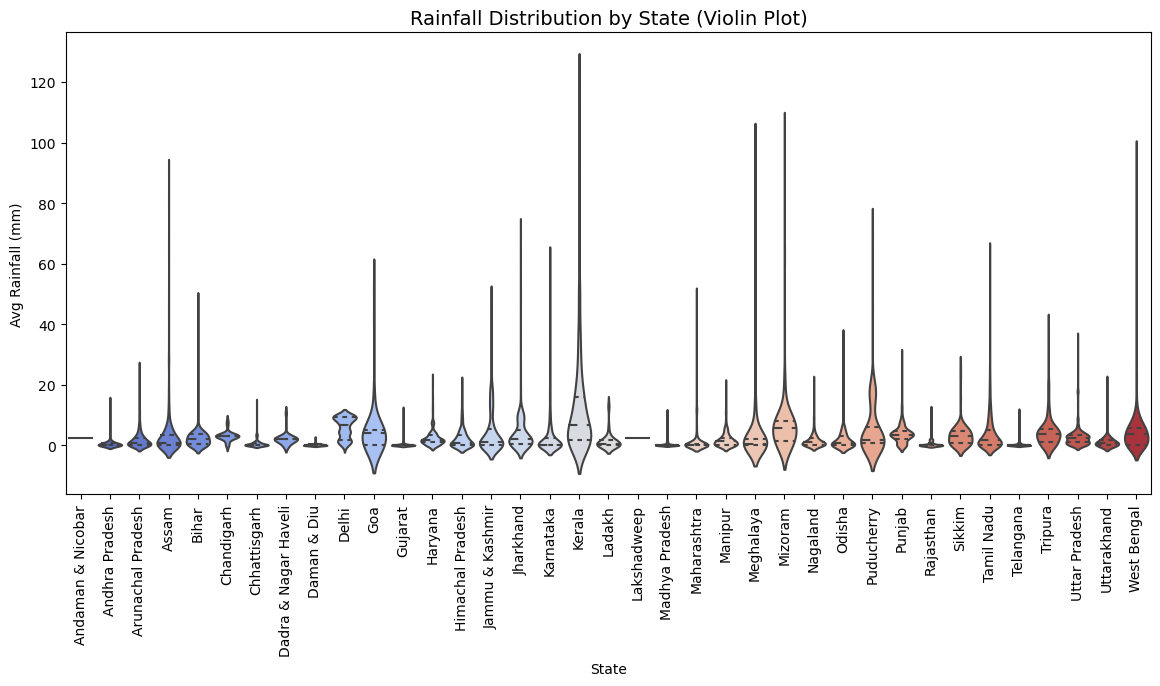

In [30]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='State', y='Avg_rainfall', data=df, scale='width', inner='quartile', palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Rainfall Distribution by State (Violin Plot)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Avg Rainfall (mm)")
plt.show()


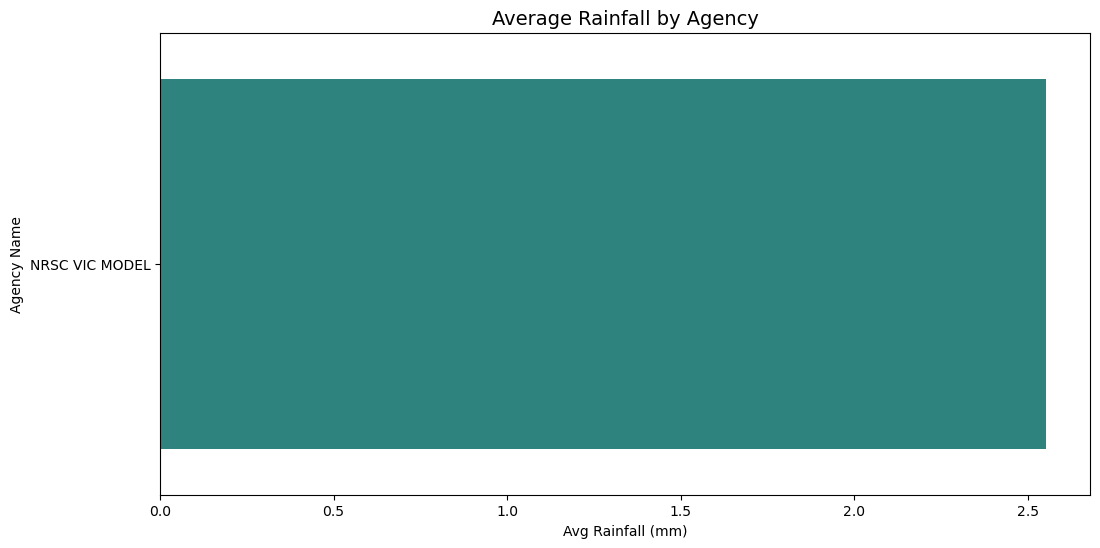

In [31]:

plt.figure(figsize=(12, 6))
agency_rainfall = df.groupby('Agency_name')['Avg_rainfall'].mean().sort_values(ascending=False)
sns.barplot(x=agency_rainfall.values, y=agency_rainfall.index, palette='viridis')
plt.title("Average Rainfall by Agency", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("Agency Name")
plt.show()

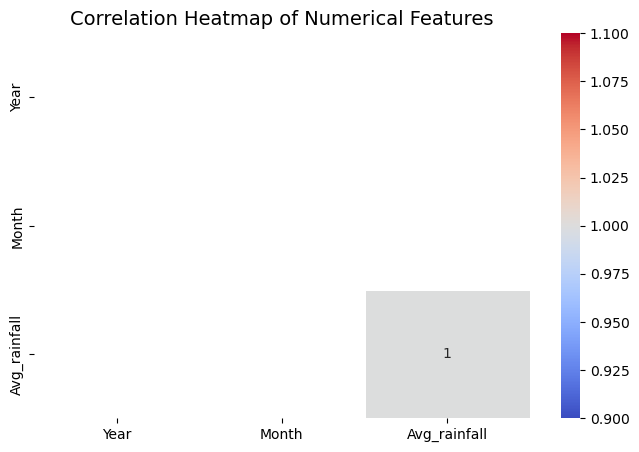

In [32]:
import numpy as np
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

The code generates a correlation heatmap.Key insights include identifying strong positive or negative correlations, detecting redundant features, and highlighting dependencies between numerical attributes.

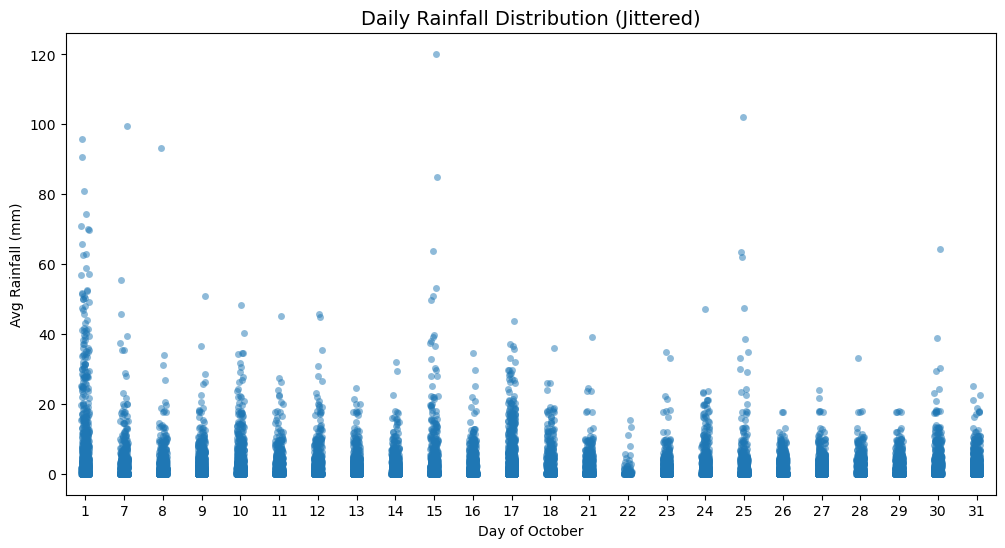

In [33]:

plt.figure(figsize=(12, 6))
sns.stripplot(x=df['Date'].dt.day, y=df['Avg_rainfall'], jitter=True, alpha=0.5)
plt.title("Daily Rainfall Distribution (Jittered)", fontsize=14)
plt.xlabel("Day of October")
plt.ylabel("Avg Rainfall (mm)")
plt.show()

The scatter plot visualizes the daily distribution of rainfall throughout October.Key insights include identifying rainfall trends over the month, detecting peak rainfall days, and observing variability in daily rainfall. 

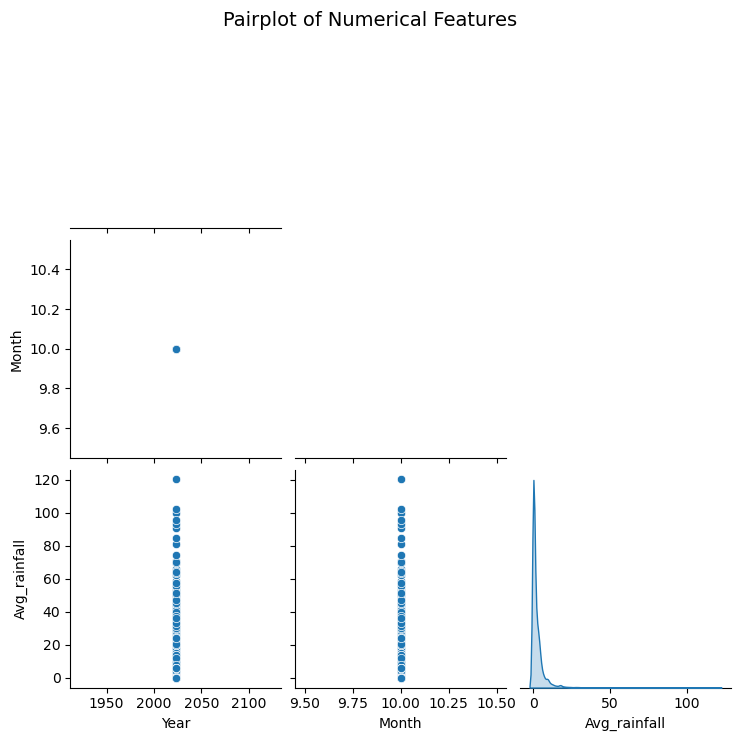

In [34]:
sns.pairplot(df[['Year', 'Month', 'Avg_rainfall']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", fontsize=14)
plt.show()

The pair plot visualizes relationships between numerical features (`Year`, `Month`, `Avg_rainfall`), Key insights include identifying correlations, detecting trends or clusters, and understanding the spread of rainfall across time. 

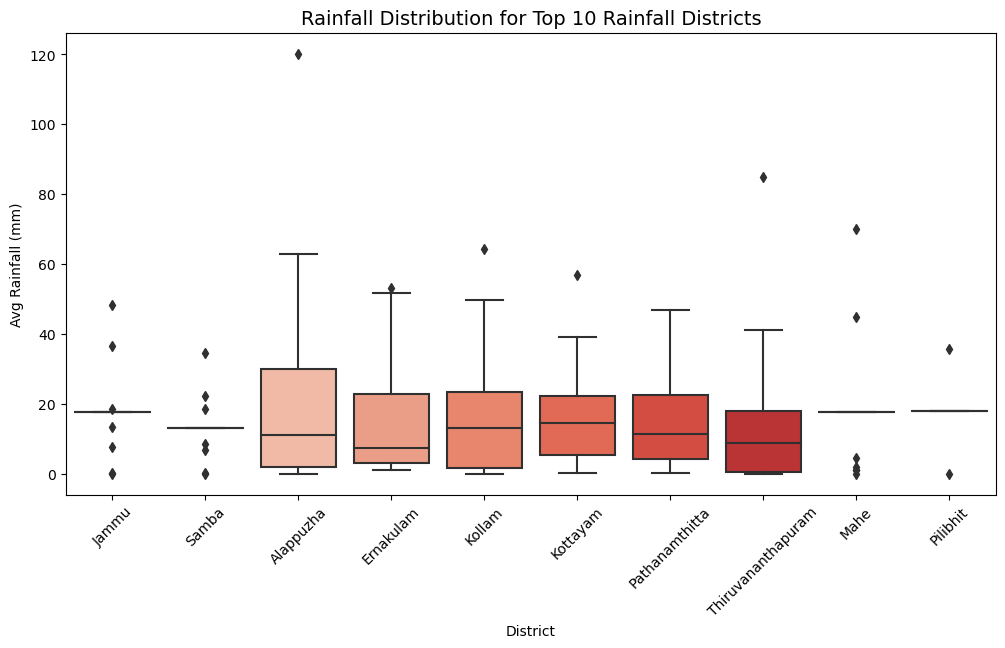

In [35]:

top_10_districts = df.groupby('District')['Avg_rainfall'].mean().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['District'].isin(top_10_districts)], x='District', y='Avg_rainfall', palette='Reds')
plt.xticks(rotation=45)
plt.title("Rainfall Distribution for Top 10 Rainfall Districts", fontsize=14)
plt.xlabel("District")
plt.ylabel("Avg Rainfall (mm)")
plt.show()


Boxplot of Rainfall by District (Top 10 Rainfall Districts)

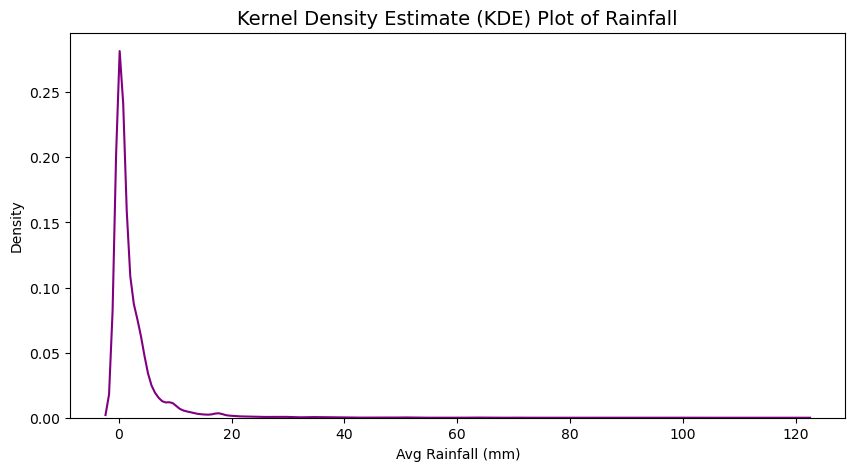

In [36]:

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Avg_rainfall'],  color='purple')
plt.title("Kernel Density Estimate (KDE) Plot of Rainfall", fontsize=14)
plt.xlabel("Avg Rainfall (mm)")
plt.show()

 KDE Plot of Rainfall Distribution

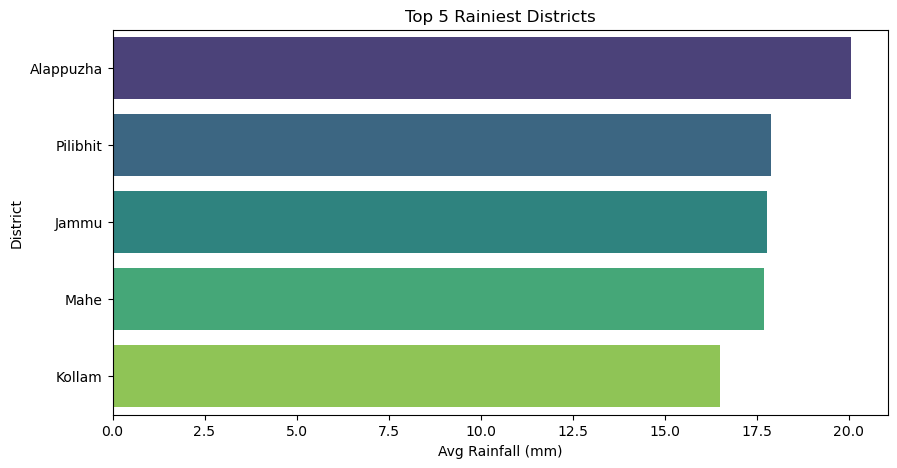

In [37]:
top_districts = df.groupby("District")["Avg_rainfall"].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_districts.index, x=top_districts.values, palette="viridis")
plt.title("Top 5 Rainiest Districts")
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("District")
plt.show()

Get top 5 districts by average rainfall

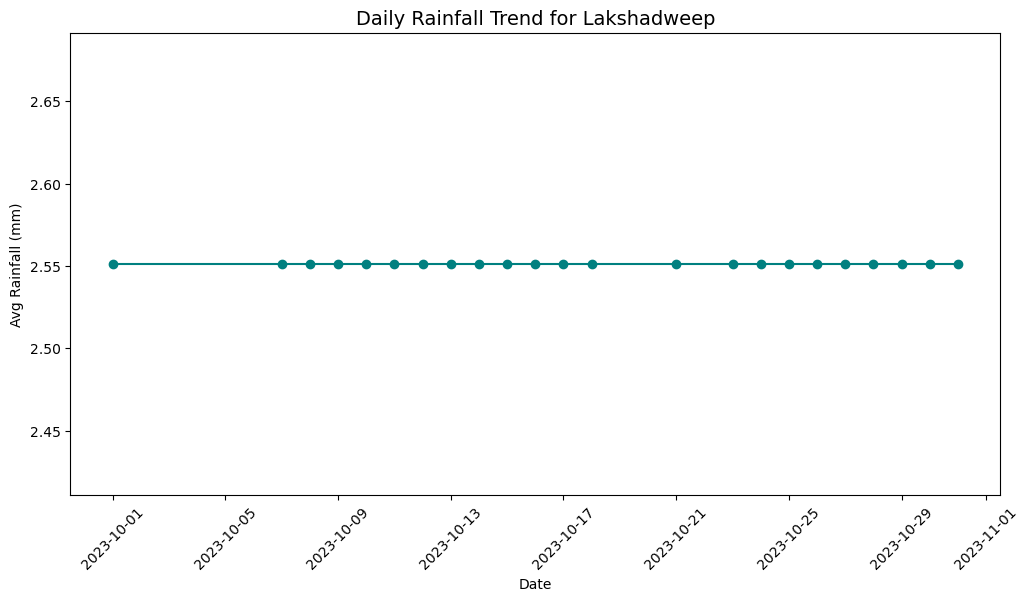

In [38]:

random_state = df['State'].sample(1, random_state=42).values[0]
state_df = df[df['State'] == random_state].groupby('Date')['Avg_rainfall'].mean()
plt.figure(figsize=(12, 6))
plt.plot(state_df, marker='o', linestyle='-', color='teal')
plt.title(f"Daily Rainfall Trend for {random_state}", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()


Line Plot of Rainfall Variation for a Randomly Selected State

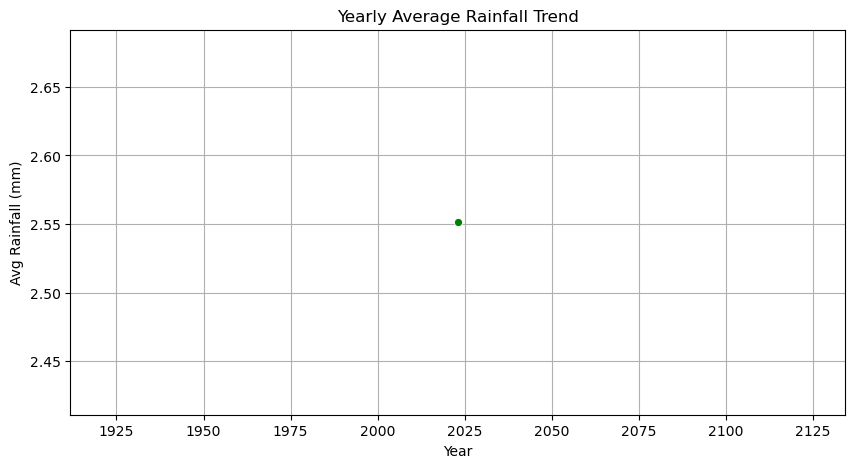

In [39]:
yearly_trend = df.groupby("Year")["Avg_rainfall"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", linestyle="-", color="green")
plt.title("Yearly Average Rainfall Trend")
plt.xlabel("Year")
plt.ylabel("Avg Rainfall (mm)")
plt.grid()
plt.show()

This code calculates the yearly average rainfall by grouping the data by "Year," then plots the trend using a line chart with markers to visualize changes in average rainfall over the years.

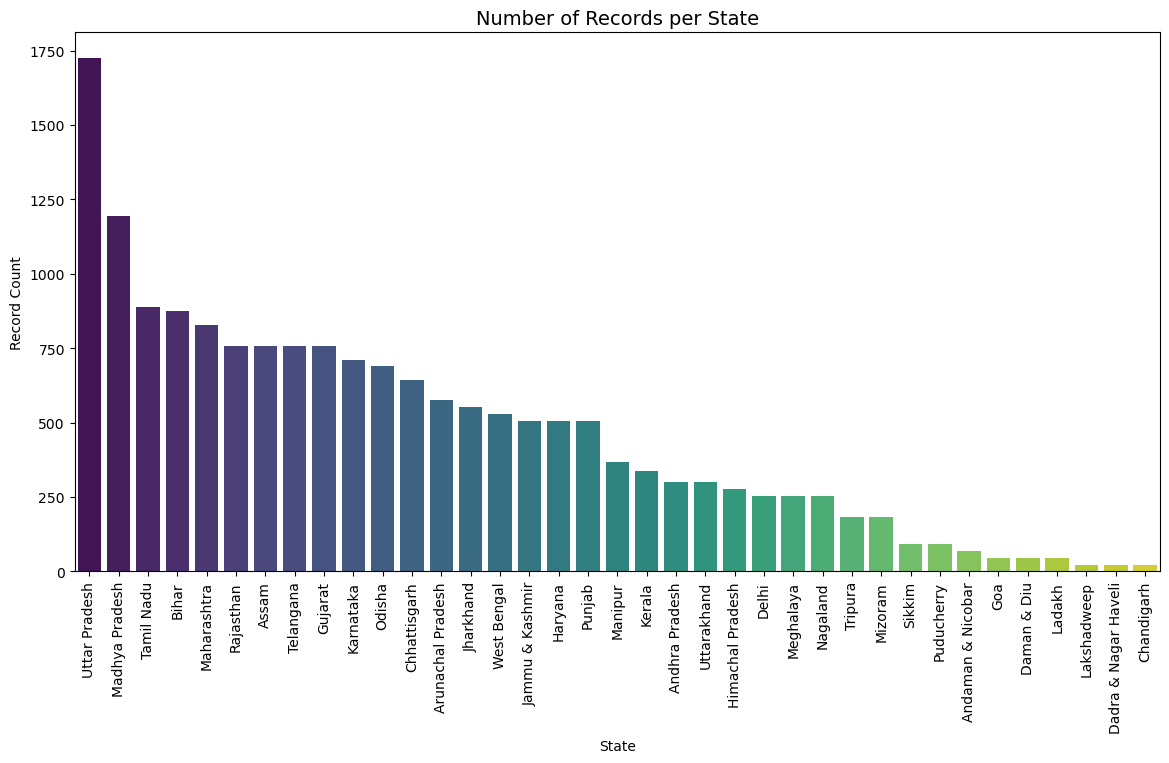

In [40]:
plt.figure(figsize=(14, 7))
state_counts = df['State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Records per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Record Count")
plt.show()

Count of Records per State (Data Distribution Check)

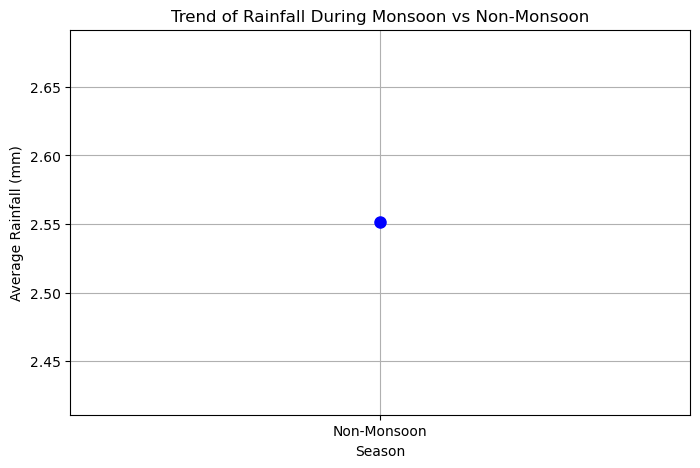

Monsoon Rainfall: nan mm
Non-Monsoon Rainfall: 2.55 mm


In [41]:
df["Monsoon_Season"] = df["Month"].between(6, 9)
monsoon_rainfall = df[df["Monsoon_Season"]]["Avg_rainfall"].mean()
non_monsoon_rainfall = df[~df["Monsoon_Season"]]["Avg_rainfall"].mean()

plt.figure(figsize=(8, 5))
months = ["Monsoon", "Non-Monsoon"]
rainfall_values = [monsoon_rainfall, non_monsoon_rainfall]
plt.plot(months, rainfall_values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
plt.xlabel("Season")
plt.ylabel("Average Rainfall (mm)")
plt.title("Trend of Rainfall During Monsoon vs Non-Monsoon")
plt.grid(True)
plt.show()
print(f"Monsoon Rainfall: {monsoon_rainfall:.2f} mm")
print(f"Non-Monsoon Rainfall: {non_monsoon_rainfall:.2f} mm")

# Observations from the dataset



1. The dataset contains 16,929 records spanning multiple states and districts across India for October 2023.  

2. There are 7 columns, namely State, District, Date, Year, Month, Avg_rainfall, and Agency_name.  

3. The Avg_rainfall column has missing values in approximately 50% of the records, which may affect analysis.  

4. The dataset is sourced from NRSC VIC Model, meaning it is model-generated and may have estimation errors.  

5. The rainfall distribution is uneven, with some districts recording high rainfall while others experienced low or no rainfall.  

6. The dataset follows a daily format, which allows for time-series analysis of rainfall trends.  

7. Some states have more complete rainfall data than others, suggesting possible gaps in data collection or reporting.  

8. The dataset does not include geographical coordinates, which could be useful for spatial analysis.  

9. The presence of zero values in rainfall data suggests drought-prone areas or dry weather conditions in certain districts.  

10. The dataset could be used for weather forecasting, agricultural planning, climate studies, and disaster management, but missing values should be handled carefully.  

